<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('credit_customers.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [4]:
df.select_dtypes(include='object').nunique()

checking_status         4
credit_history          5
purpose                10
savings_status          5
employment              5
personal_status         4
other_parties           3
property_magnitude      4
other_payment_plans     3
housing                 3
job                     4
own_telephone           2
foreign_worker          2
class                   2
dtype: int64

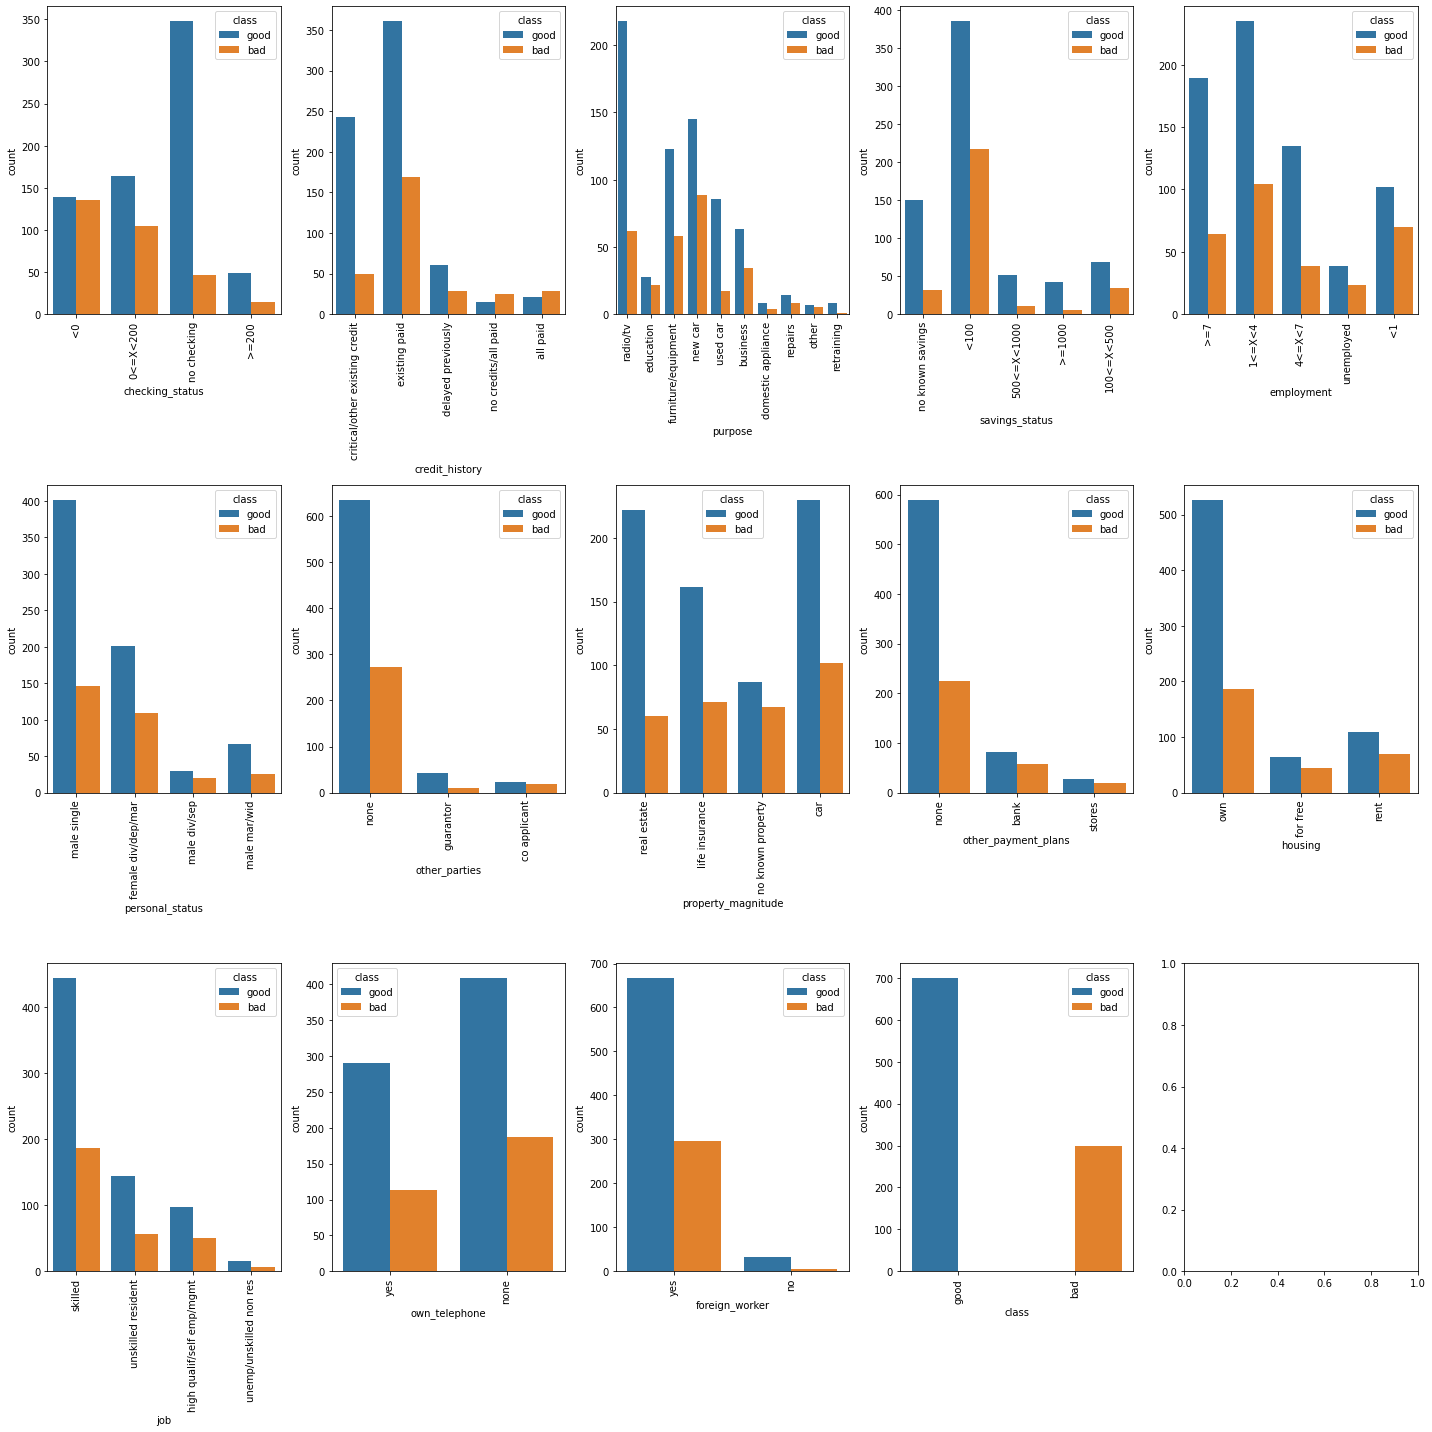

In [5]:
# categorical variables
cat = df.select_dtypes(include='object').columns
    
# plot

fig,axs = plt.subplots(nrows=3, ncols=5, figsize=(20,20))
axs = axs.flatten()

# barplot
for i,var in enumerate(cat):
    sns.countplot(x=var, hue='class', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
fig.tight_layout()    
plt.show()

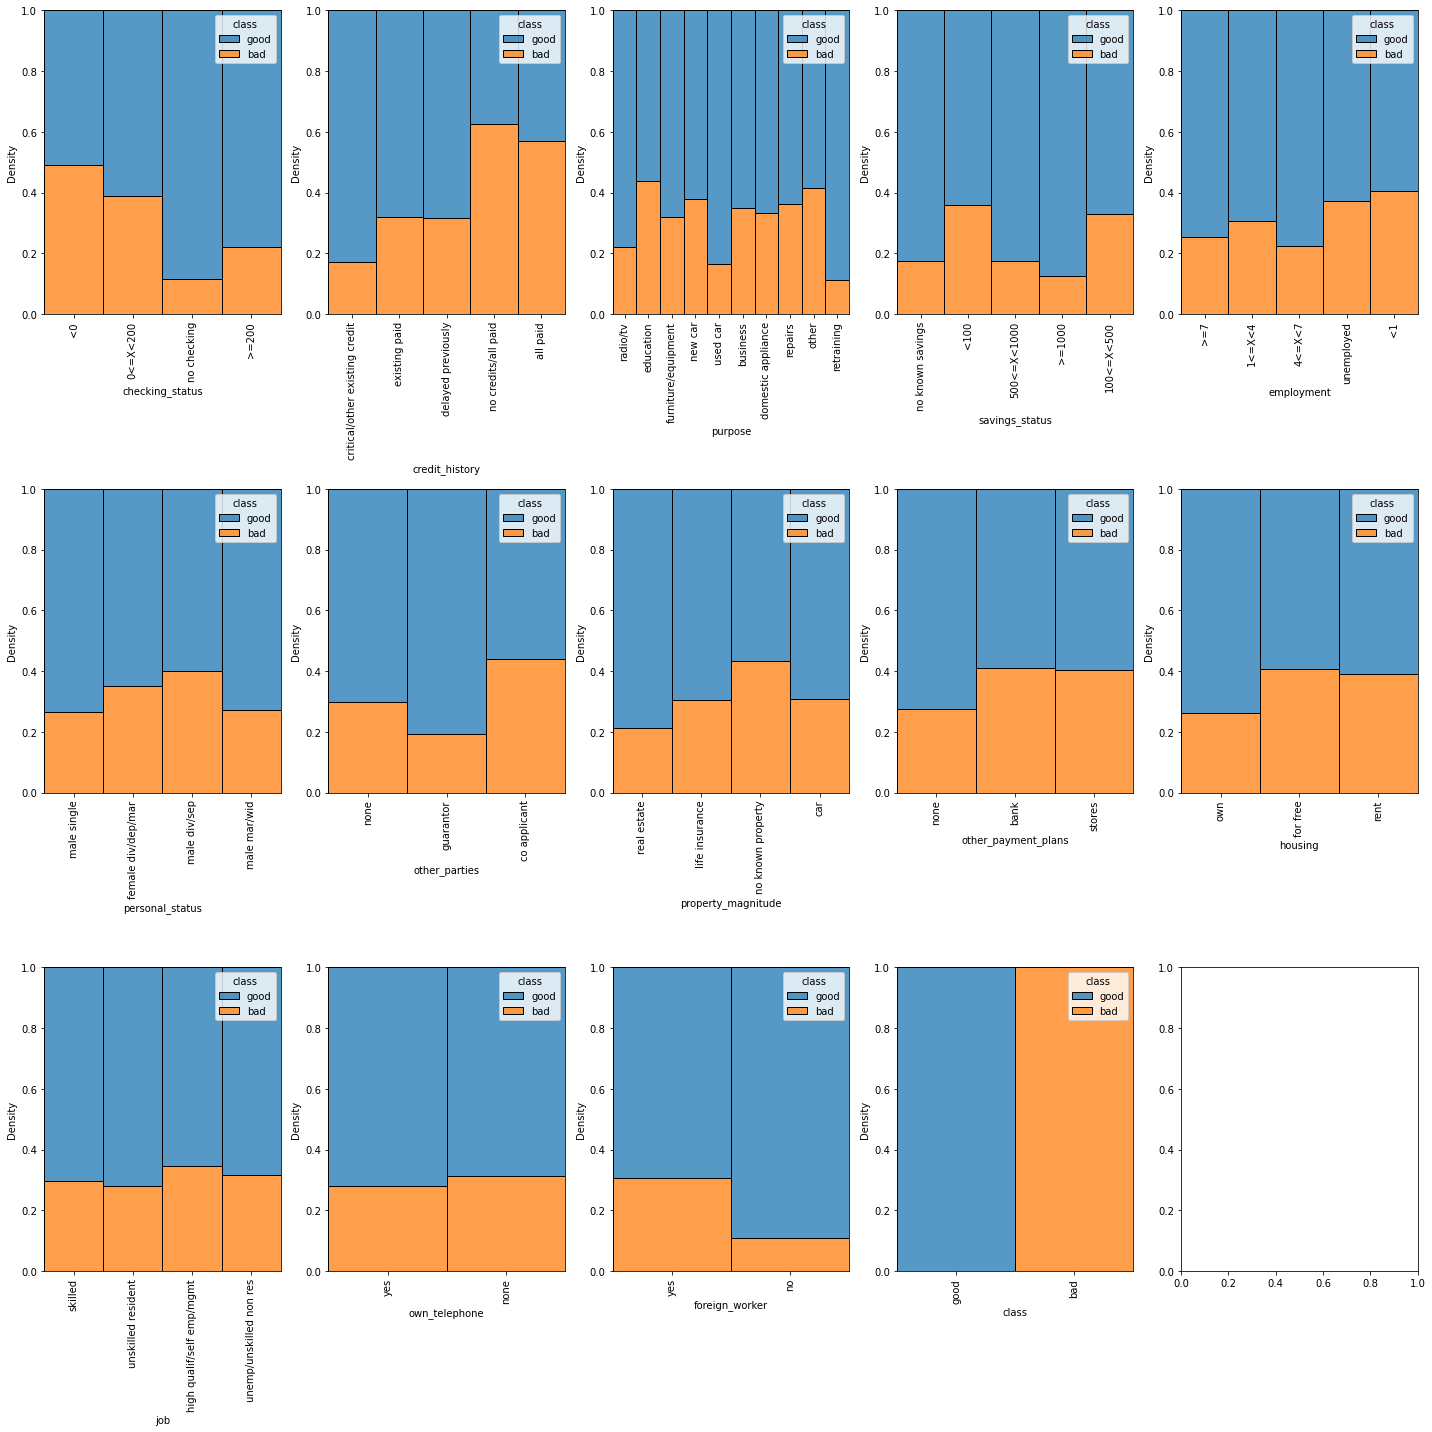

In [6]:
# histograms for categorical varriables

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
axs = axs.flatten()

for i,var in enumerate(cat):
    sns.histplot(x=var, hue='class', data=df, ax=axs[i], multiple='fill', kde=False, element='bars',
                fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
    
fig.tight_layout()
plt.show()

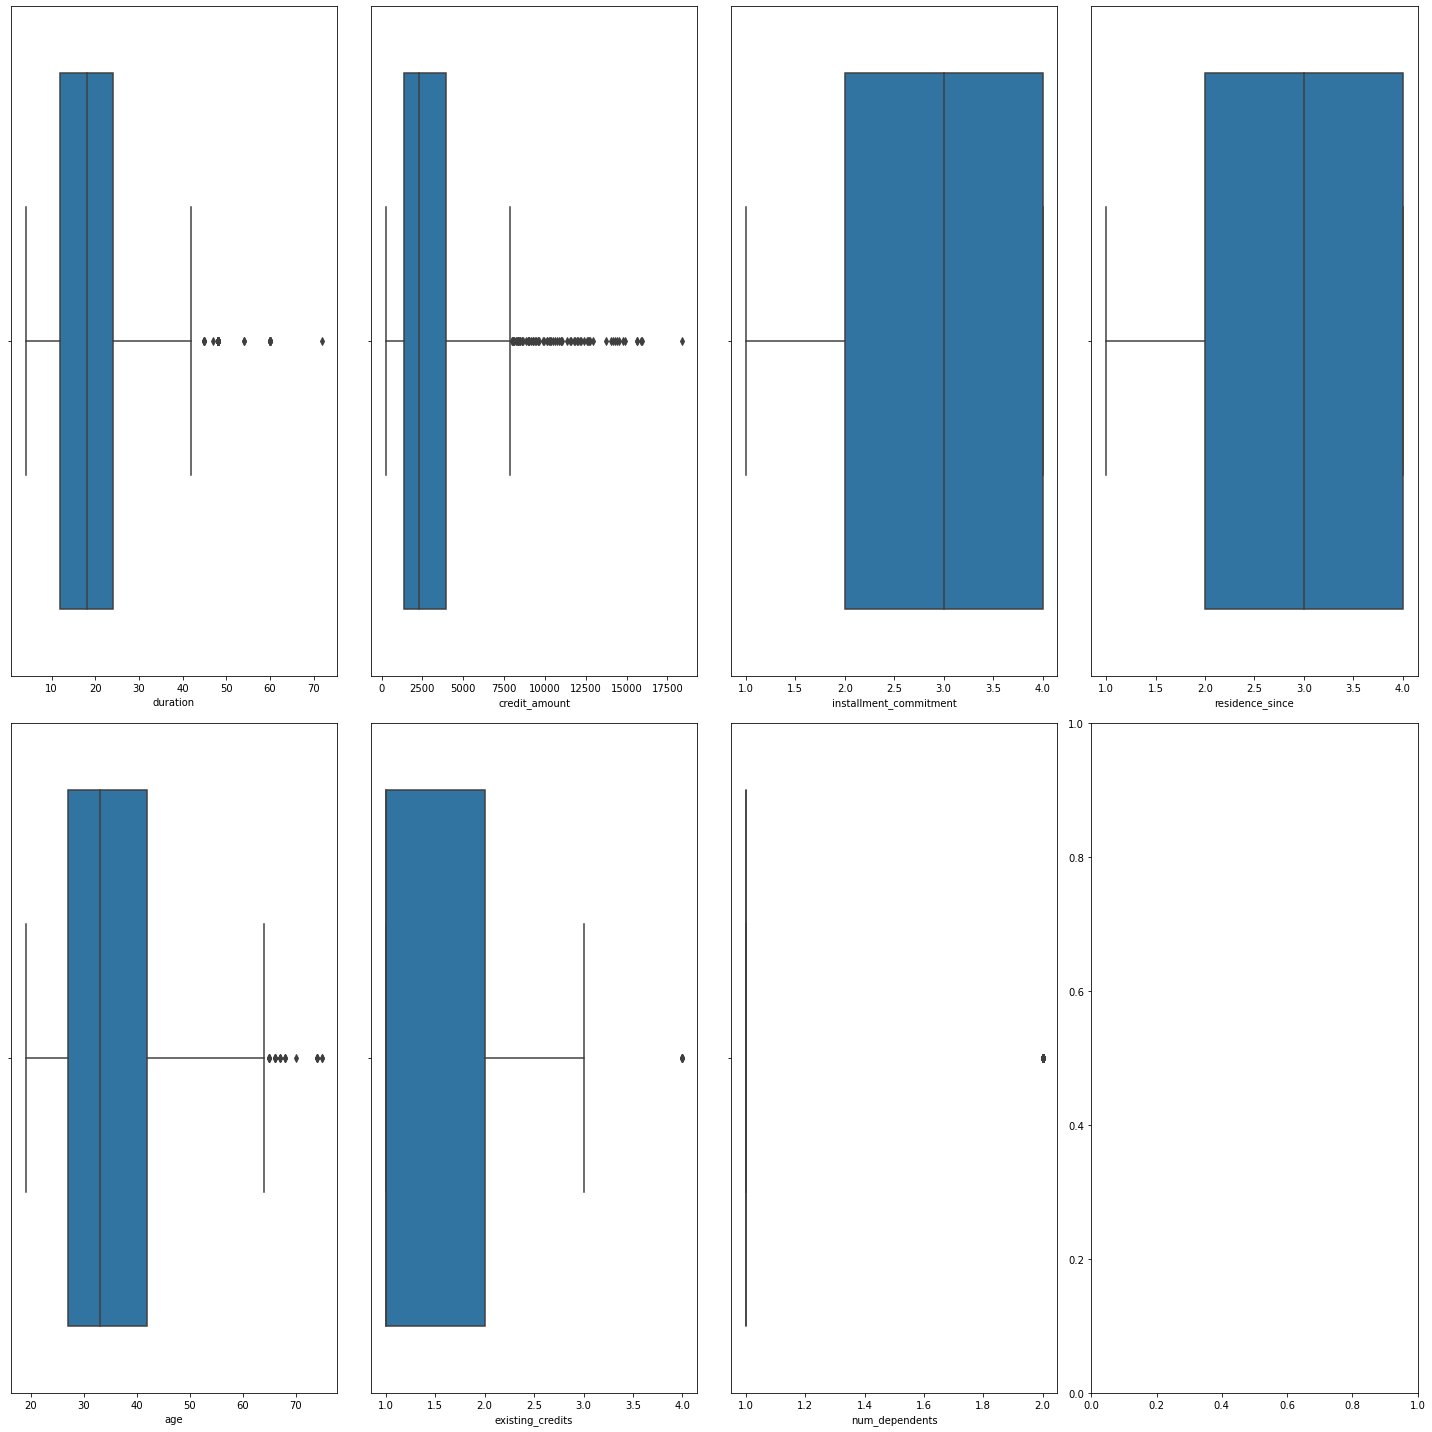

In [7]:
# boxplots for numerical variables
num = df.select_dtypes(exclude='object').columns

fig,axs = plt.subplots(nrows=2, ncols=4, figsize=(20,20))
axs = axs.flatten()

for i,var in enumerate(num):
    sns.boxplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()
plt.show()

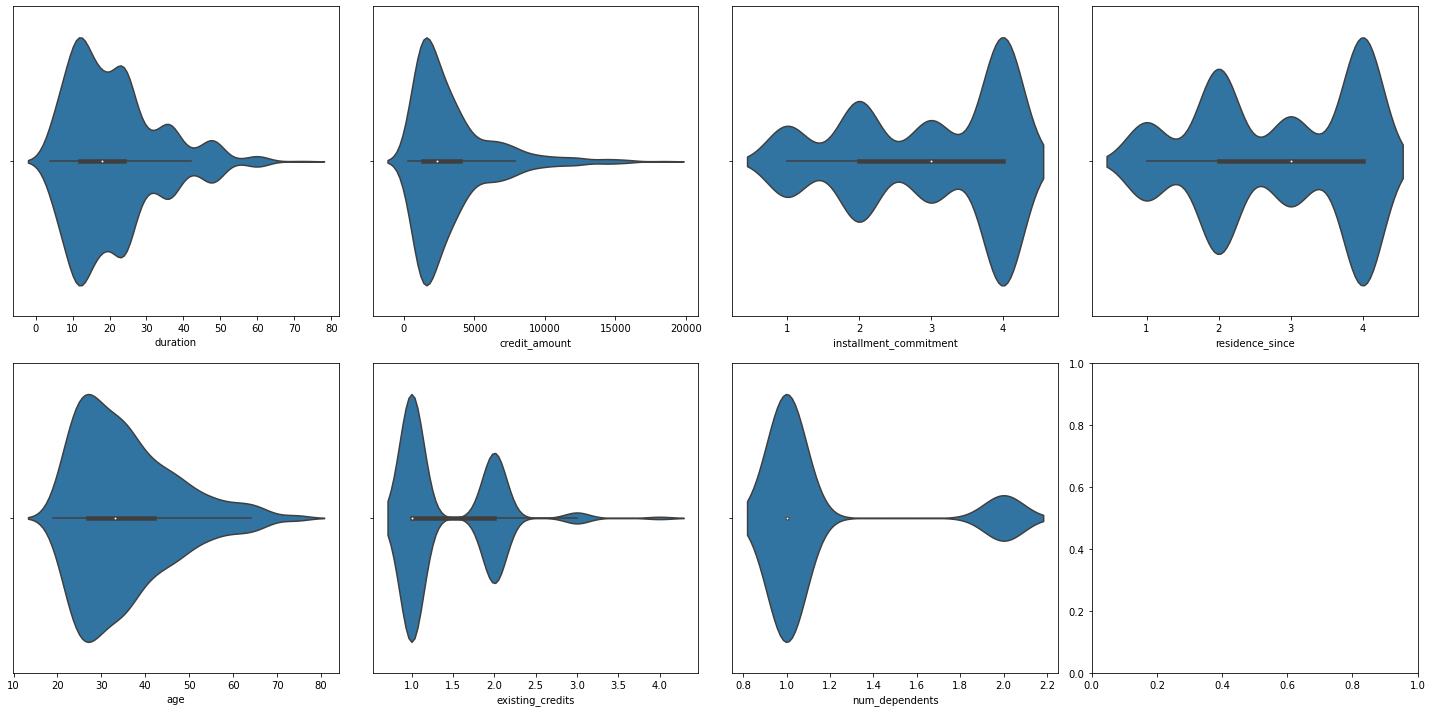

In [8]:
# violinplots

fig,axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axs = axs.flatten()

for i,var in enumerate(num):
    sns.violinplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()
plt.show()

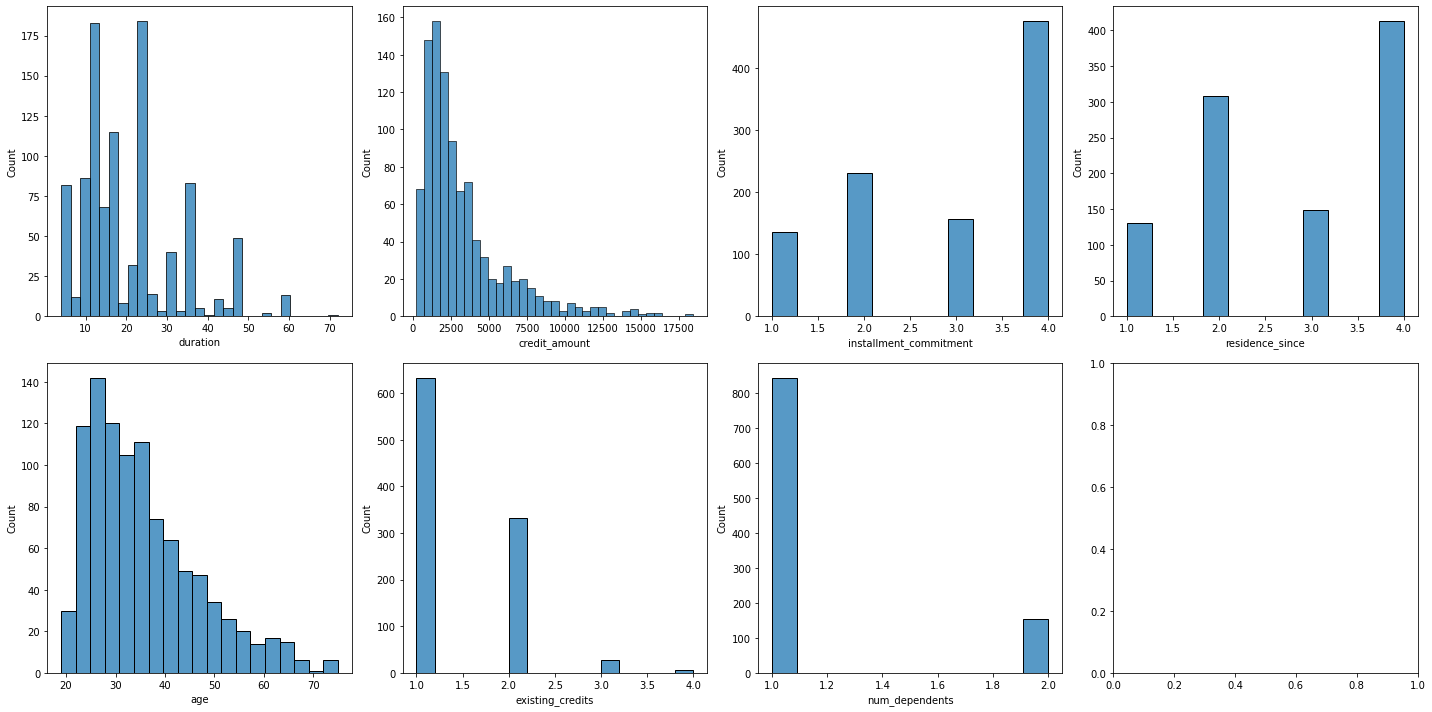

In [9]:
# histplots

fig,axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axs = axs.flatten()

for i,var in enumerate(num):
    sns.histplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()
plt.show()

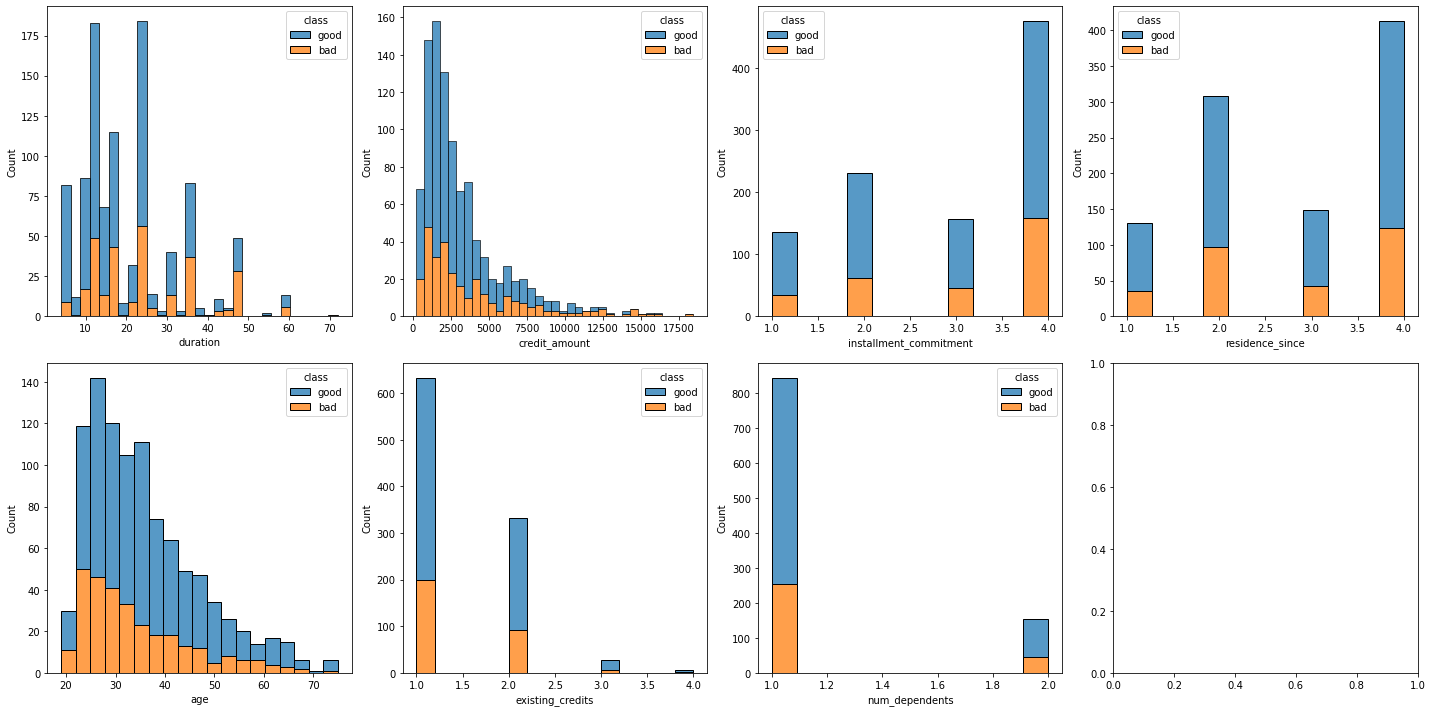

In [10]:
fig,axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axs = axs.flatten()

for i,var in enumerate(num):
    sns.histplot(x=var, hue='class', data=df, ax=axs[i], multiple='stack')
    
fig.tight_layout()
plt.show()

In [11]:
df.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [12]:
for col in df.select_dtypes(include=['object']).columns:
    print(f'{col}: {df[col].unique()}')

checking_status: ['<0' '0<=X<200' 'no checking' '>=200']
credit_history: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
purpose: ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
savings_status: ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
employment: ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
personal_status: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
other_parties: ['none' 'guarantor' 'co applicant']
property_magnitude: ['real estate' 'life insurance' 'no known property' 'car']
other_payment_plans: ['none' 'bank' 'stores']
housing: ['own' 'for free' 'rent']
job: ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
own_telephone: ['yes' 'none']
foreign_worker: ['yes' 'no']
class: ['good' 'bad']


In [13]:
for col in df.select_dtypes(include=['object']).columns:
    
    le = LabelEncoder()
    le.fit(df[col].unique())
    df[col] = le.transform(df[col])
    
    # print the encoded values
    print(f"{col}: {df[col].unique()}")

checking_status: [1 0 3 2]
credit_history: [1 3 2 4 0]
purpose: [6 2 3 4 9 0 1 7 5 8]
savings_status: [4 2 1 3 0]
employment: [3 0 1 4 2]
personal_status: [3 0 1 2]
other_parties: [2 1 0]
property_magnitude: [3 1 2 0]
other_payment_plans: [1 0 2]
housing: [1 0 2]
job: [1 3 0 2]
own_telephone: [1 0]
foreign_worker: [1 0]
class: [1 0]


In [14]:
df.isnull().sum().sum()

0

1    700
0    300
Name: class, dtype: int64

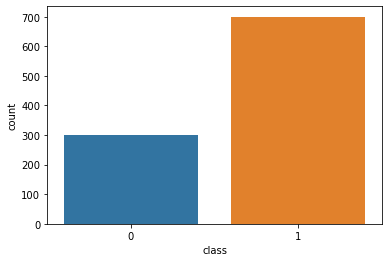

In [15]:
sns.countplot(df['class'])
df['class'].value_counts()

Imbalanced class.

In [16]:
from sklearn.utils import resample

# creating separate dfs for majority and minority class
df_majority = df[df['class']==1]
df_minority = df[df['class']==0]

# upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=700, random_state=0)

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

1    700
0    700
Name: class, dtype: int64

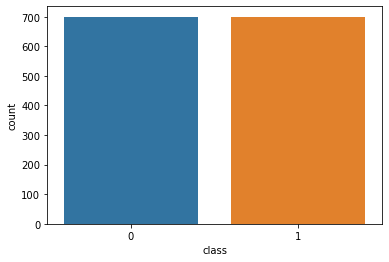

In [17]:
sns.countplot(df_upsampled['class'])
df_upsampled['class'].value_counts()

In [18]:
# removing outliers using z score - for numerical columns

from scipy import stats

def remove_outliers(df_upsampled, cols, threshold=3):
    for col in cols:
        z = np.abs(stats.zscore(df_upsampled[col]))
        df_upsampled = df_upsampled[(z<threshold) | (df_upsampled[col].isnull())]
    return df_upsampled

In [19]:
selected_cols = ['duration','credit_amount','age']
df_clean = remove_outliers(df_upsampled, selected_cols)
df_clean.shape

(1340, 21)

<AxesSubplot:>

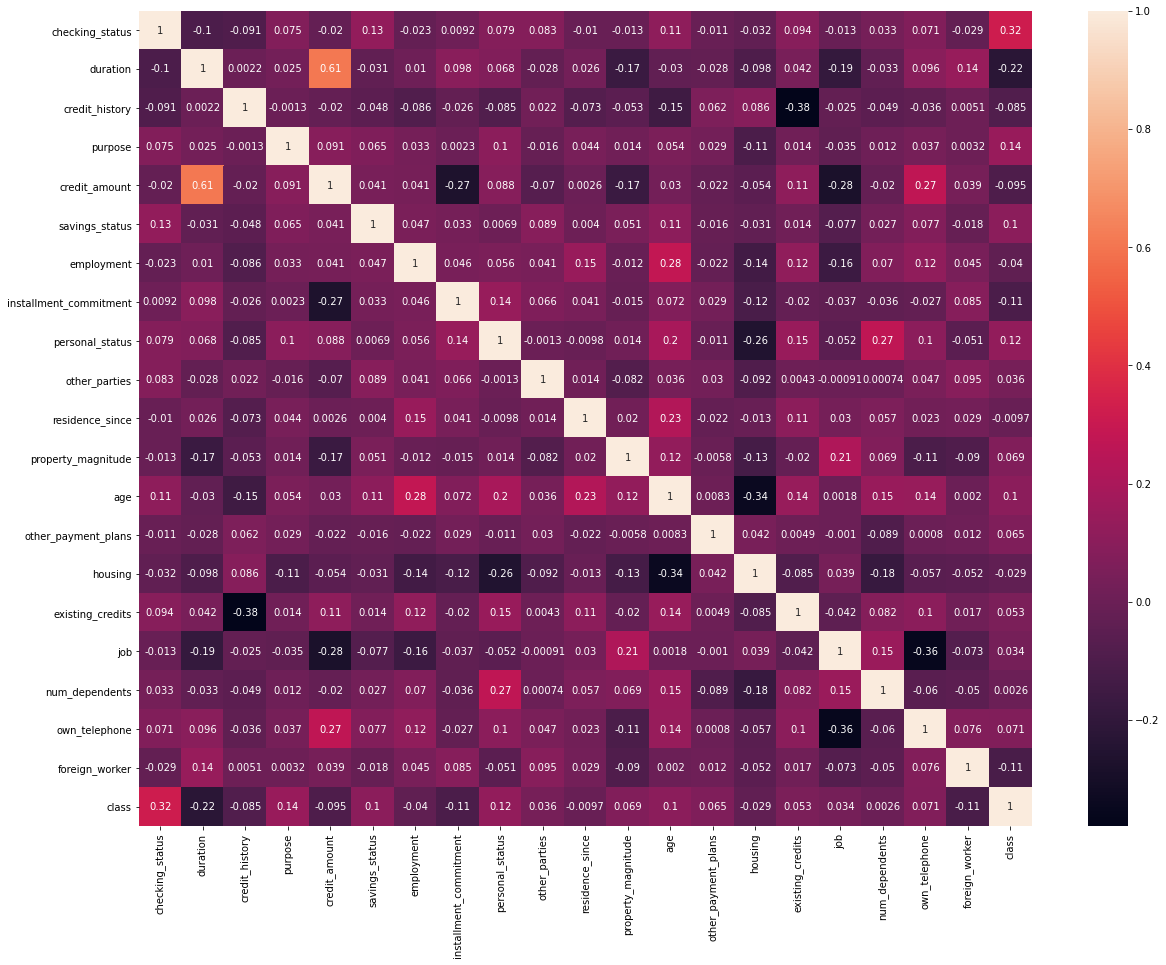

In [20]:
# correlation

plt.figure(figsize= (20,15))
sns.heatmap(df_clean.corr(), fmt='.2g', annot=True)

In [21]:
# model building

X = df_clean.drop('class', axis=1)
y = df_clean['class']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [58]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
param_grid = {'max_depth': [3,4,5,6,7,8],
             'min_samples_split': [2,3,4],
             'min_samples_leaf': [1,2,3,4]}

# Grid search with CV to find the best hyperparameters

grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [59]:
dt = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=3, random_state=0)

In [60]:
y_pred = dt.predict(X_test)
print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100,2),'%')

Accuracy Score: 74.63 %


In [61]:
from sklearn.metrics import f1_score, precision_score, recall_score

print('F1 Score:', f1_score(y_test, y_pred, average='micro'))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))

F1 Score: 0.746268656716418
Precision: 0.746268656716418
Recall: 0.746268656716418


Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.746268656716418')

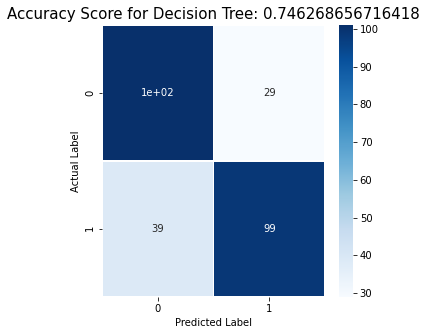

In [62]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidth=.5, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dt.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

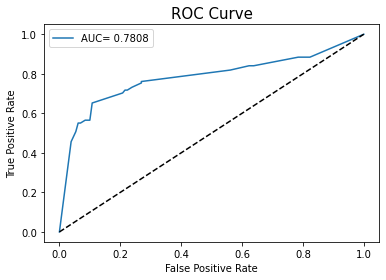

In [63]:
# ROC-AUC Curve

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = dt.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=
                                                                                                   ['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label= 'AUC= %.4f' %auc)
plt.plot(fpr, fpr, linestyle= '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=15)
plt.legend()

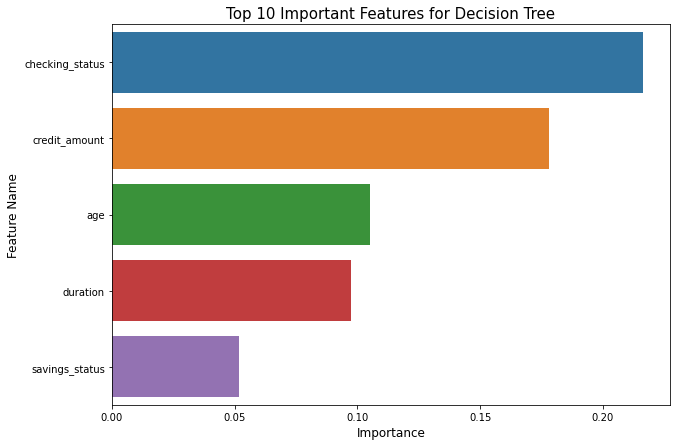

In [64]:
# Feature Importance

imp_df = pd.DataFrame({'Feature Name': X_train.columns,
                      'Importance': dt.feature_importances_})

fi = imp_df.sort_values(by= 'Importance', ascending=False)

fi2 = fi.head()
plt.figure(figsize=(10,7))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Important Features for Decision Tree', fontsize=15)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.show()

In [65]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_grid = {'n_estimators': [100,200],
             'max_depth': [None, 5, 10],
             'max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [66]:
rf = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=200, random_state=0)

In [67]:
y_pred = rf.predict(X_test)
print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100,2),'%')

Accuracy Score: 88.81 %


In [68]:
print('F1 Score:', f1_score(y_test, y_pred, average='micro'))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))

F1 Score: 0.8880597014925373
Precision: 0.8880597014925373
Recall: 0.8880597014925373


Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8880597014925373')

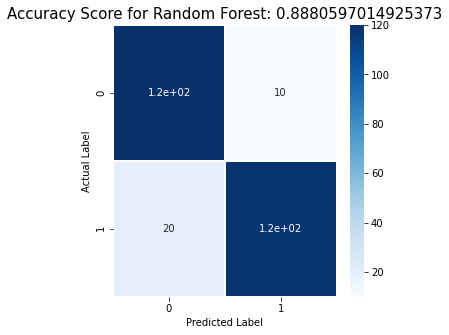

In [69]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidth=.5, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

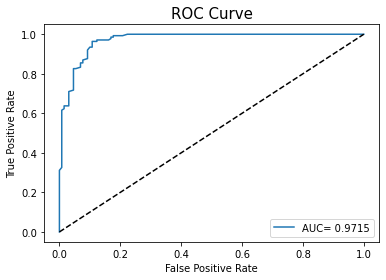

In [70]:
# ROC-AUC Curve

y_pred_proba = rf.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=
                                                                                                   ['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label= 'AUC= %.4f' %auc)
plt.plot(fpr, fpr, linestyle= '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=15)
plt.legend()

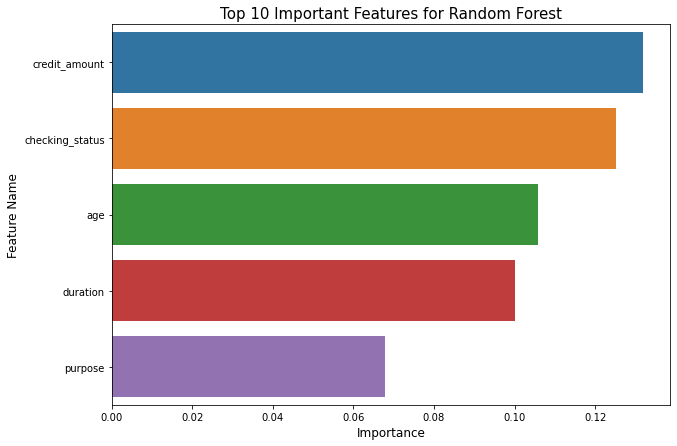

In [71]:
# Feature Importance

imp_df = pd.DataFrame({'Feature Name': X_train.columns,
                      'Importance': rf.feature_importances_})

fi = imp_df.sort_values(by= 'Importance', ascending=False)

fi2 = fi.head()
plt.figure(figsize=(10,7))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Important Features for Random Forest', fontsize=15)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.show()

In [72]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
param_grid = {'penalty': ['l1','l2'],
             'solver': ['liblinear','saga']}

grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'penalty': 'l1', 'solver': 'liblinear'}


In [73]:
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100,2), '%')

Accuracy Score: 73.88 %


In [74]:
print('F1 Score:', f1_score(y_test, y_pred, average='micro'))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))

F1 Score: 0.7388059701492538
Precision: 0.7388059701492538
Recall: 0.7388059701492538


Text(0.5, 1.0, 'Accuracy Score for Logistic Regression: 0.7388059701492538')

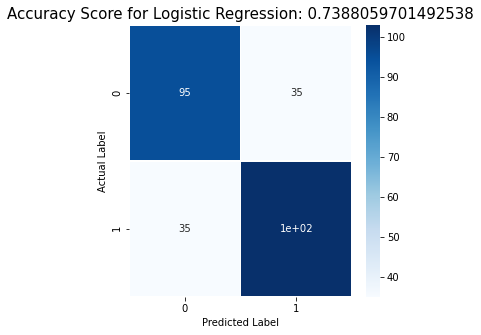

In [75]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidth=.5, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(lr.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

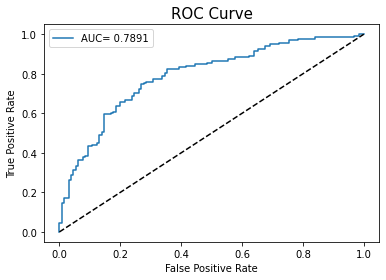

In [76]:
# ROC-AUC Curve

y_pred_proba = lr.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=
                                                                                                   ['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label= 'AUC= %.4f' %auc)
plt.plot(fpr, fpr, linestyle= '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=15)
plt.legend()